# WeatherPy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 574


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | edinburgh of the seven seas
Processing Record 2 of Set 1 | petropavlovsk-kamchatsky
Processing Record 3 of Set 1 | rudbar
Processing Record 4 of Set 1 | lihue
Processing Record 5 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 6 of Set 1 | adamstown
Processing Record 7 of Set 1 | puerto ayora
Processing Record 8 of Set 1 | charters towers
Processing Record 9 of Set 1 | hayma'
City not found. Skipping...
Processing Record 10 of Set 1 | port-aux-francais
Processing Record 11 of Set 1 | bilibino
Processing Record 12 of Set 1 | formosa
Processing Record 13 of Set 1 | polyarnyy
Processing Record 14 of Set 1 | waitangi
Processing Record 15 of Set 1 | cardigan
Processing Record 16 of Set 1 | puerto natales
Processing Record 17 of Set 1 | portland
Processing Record 18 of Set 1 | tranovaho
City not found. Skipping...
Processing Record 19 of Set 1 | ghat
Processing Record 20 of S

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          547
Lat           547
Lng           547
Max Temp      547
Humidity      547
Cloudiness    547
Wind Speed    547
Country       547
Date          547
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,edinburgh of the seven seas,-37.0676,-12.3116,11.53,89,100,15.28,SH,1723137524
1,petropavlovsk-kamchatsky,53.0452,158.6483,16.33,67,75,4.00,RU,1723137524
2,rudbar,30.1500,62.6000,37.58,9,0,2.87,AF,1723137524
3,lihue,21.9789,-159.3672,24.77,81,40,4.12,US,1723137524
4,adamstown,-25.0660,-130.1015,21.25,72,94,9.03,PN,1723137525


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,11.53,89,100,15.28,SH,1723137524
1,petropavlovsk-kamchatsky,53.0452,158.6483,16.33,67,75,4.00,RU,1723137524
2,rudbar,30.1500,62.6000,37.58,9,0,2.87,AF,1723137524
3,lihue,21.9789,-159.3672,24.77,81,40,4.12,US,1723137524
4,adamstown,-25.0660,-130.1015,21.25,72,94,9.03,PN,1723137525


### Create the Scatter Plots Requested

In [8]:
# Look for the date
dates_pd = pd.DataFrame(city_data_df["Date"])
for i, row in dates_pd.iterrows():
    year,month,day,*_ = time.gmtime(row["Date"])
    dates_pd.loc[i,"Date2"] = (f"{year}-{month}-{day}")
dates_pd["Date2"].unique()
date = dates_pd["Date2"].unique()
date

array(['2024-8-8'], dtype=object)

#### Temperature Vs. Latitude

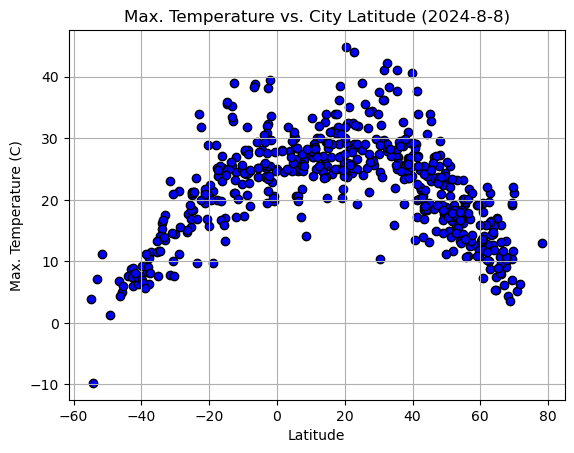

In [9]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values,y_values,color="b",edgecolors="black")


# Incorporate the other graph properties
plt.title(f"Max. Temperature vs. City Latitude ({date[0]})")
plt.xlabel("Latitude")
plt.ylabel("Max. Temperature (C)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Humidity Vs. Latitude

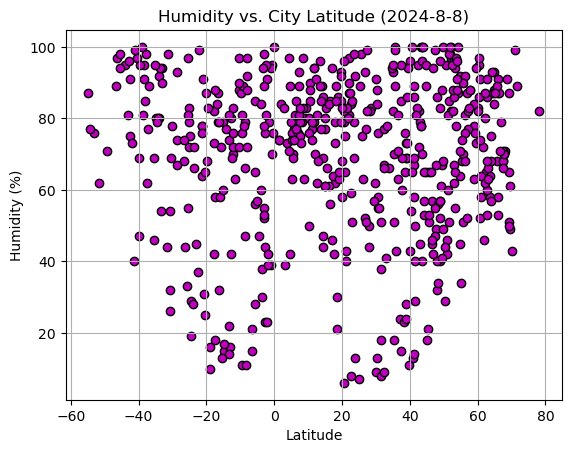

In [10]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values,y_values,color="m", edgecolors="black")

# Incorporate the other graph properties
plt.title(f"Humidity vs. City Latitude ({date[0]})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Cloudiness  Vs. Latitude

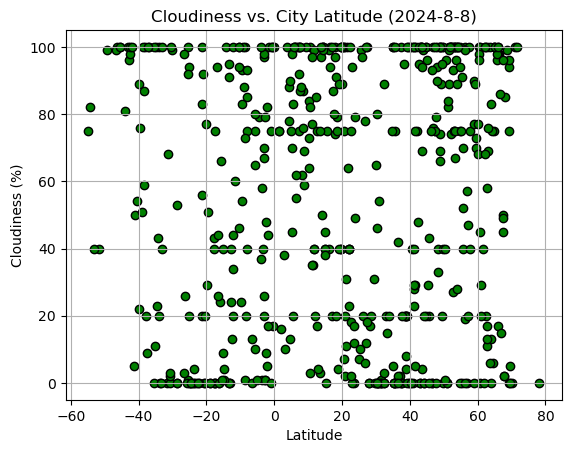

In [11]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values,y_values,color="g",edgecolors="black")

# Incorporate the other graph properties
plt.title(f"Cloudiness vs. City Latitude ({date[0]})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Wind Speed Plot Vs. Latitude

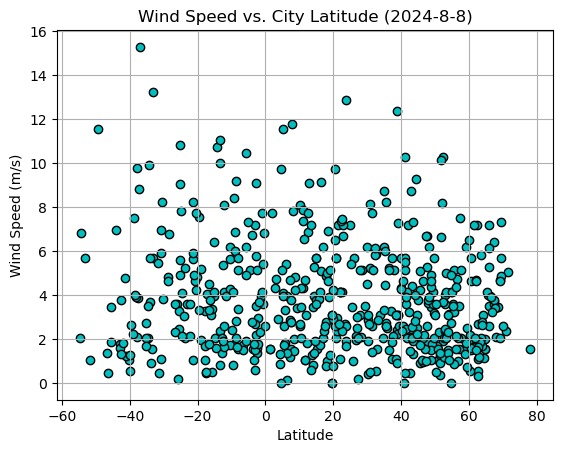

In [12]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values,y_values,color="c",edgecolors="black")

# Incorporate the other graph properties
plt.title(f"Wind Speed vs. City Latitude ({date[0]})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def linear_reg_plots(x_values, y_values, hemis, y_label, color, fig):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    regress_values = x_values * slope + intercept
    plt.scatter(x_values,y_values,color=color,edgecolors="black")
    plt.plot(x_values,regress_values,"r-")
    plt.title(f"{(y_values).name} vs. City Latitude - {hemis}")
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.annotate(line_eq,(min(x_values),min(y_values)),fontsize=10,color="r",
                 bbox=dict(boxstyle="square,pad=0.2", fc="white", lw=0.5))
    print(f"The r-value is: {rvalue}")
    plt.savefig(f"output_data/Fig{fig}.png")
    plt.show()

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,petropavlovsk-kamchatsky,53.0452,158.6483,16.33,67,75,4.00,RU,1723137524
2,rudbar,30.1500,62.6000,37.58,9,0,2.87,AF,1723137524
3,lihue,21.9789,-159.3672,24.77,81,40,4.12,US,1723137524
8,bilibino,68.0546,166.4372,4.45,71,85,2.08,RU,1723137287
10,polyarnyy,69.1989,33.4478,19.23,51,94,4.68,RU,1723137525


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,11.53,89,100,15.28,SH,1723137524
4,adamstown,-25.0660,-130.1015,21.25,72,94,9.03,PN,1723137525
5,puerto ayora,-0.7393,-90.3518,19.75,95,100,3.58,EC,1723137525
6,charters towers,-20.1000,146.2667,15.83,87,77,4.83,AU,1723137525
7,port-aux-francais,-49.3500,70.2167,1.35,71,99,11.55,TF,1723137525


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.6889279623199395


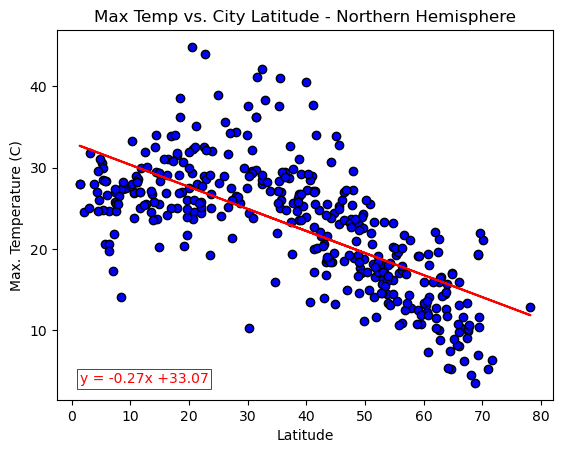

In [16]:
# Linear regression on Northern Hemisphere
param = {"x_values": northern_hemi_df["Lat"],
         "y_values": northern_hemi_df["Max Temp"],
         "hemis": "Northern Hemisphere",
         "y_label": "Max. Temperature (C)",
         "color": "b",
         "fig": 5
}
linear_reg_plots(**param)

The r-value is: 0.8183864343680886


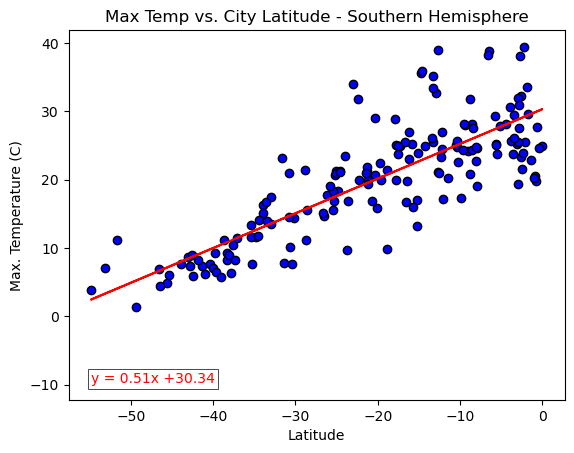

In [17]:
# Linear regression on Southern Hemisphere
param = {"x_values": southern_hemi_df["Lat"],
         "y_values": southern_hemi_df["Max Temp"],
         "hemis": "Southern Hemisphere",
         "y_label": "Max. Temperature (C)",
         "color": "b",
         "fig": 6
}
linear_reg_plots(**param)

**Discussion about the linear relationship:**

- The r-value > 0.7 for both hemispheres shows that there is a strong correlation between the latitude where the city is located and the maximum temperature.
- This correlation can be seen on how the observations are around the regression line.
- The closer the cities get to the equator the higher the maximum temperature is. This is shown with the negative correlation in the northern hemisphere and with the positive correlation in the southern hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.0093633708805896


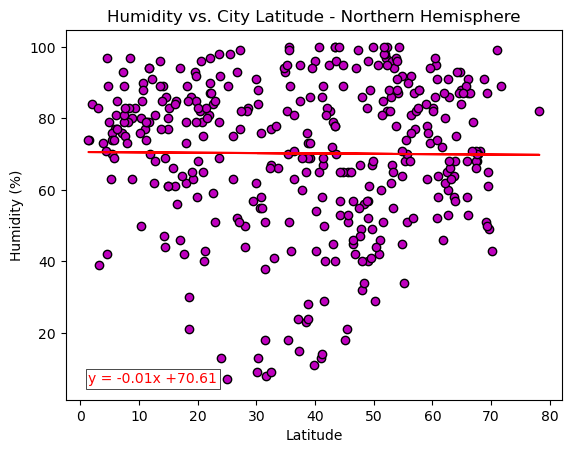

In [18]:
# Northern Hemisphere
param = {"x_values": northern_hemi_df["Lat"],
         "y_values": northern_hemi_df["Humidity"],
         "hemis": "Northern Hemisphere",
         "y_label": "Humidity (%)",
         "color": "m",
         "fig": 7
}
linear_reg_plots(**param)

The r-value is: -0.2434871637600568


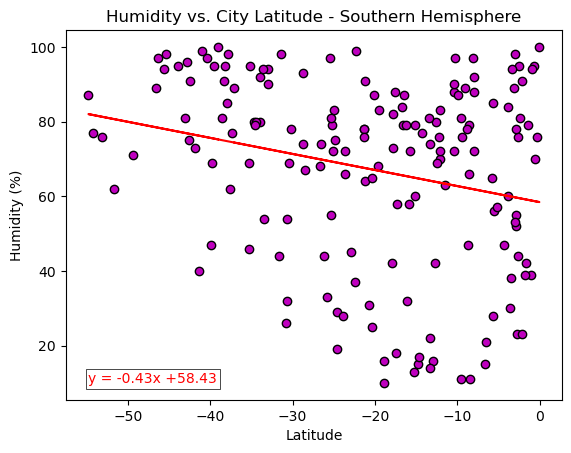

In [19]:
# Southern Hemisphere
param = {"x_values": southern_hemi_df["Lat"],
         "y_values": southern_hemi_df["Humidity"],
         "hemis": "Southern Hemisphere",
         "y_label": "Humidity (%)",
         "color": "m",
         "fig": 8
}
linear_reg_plots(**param)

**Discussion about the linear relationship:**

- The r-value < 0.3 shows there is a very week correlation between the latitude and the humidity.
- This means there is no relation between the distance to the equator and the city humidity %.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.007969945455945511


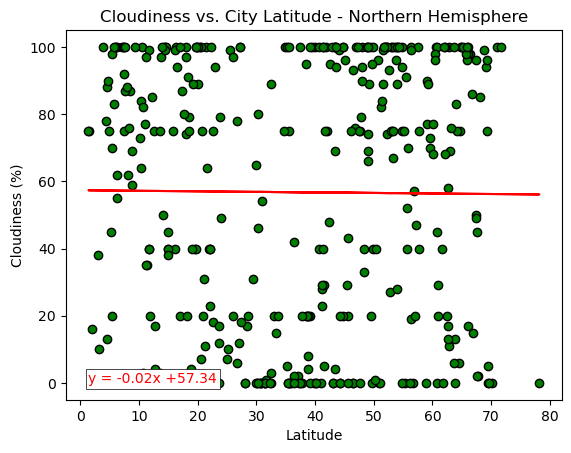

In [20]:
# Northern Hemisphere
param = {"x_values": northern_hemi_df["Lat"],
         "y_values": northern_hemi_df["Cloudiness"],
         "hemis": "Northern Hemisphere",
         "y_label": "Cloudiness (%)",
         "color": "g",
         "fig": 9
}
linear_reg_plots(**param)

The r-value is: -0.11982938782841542


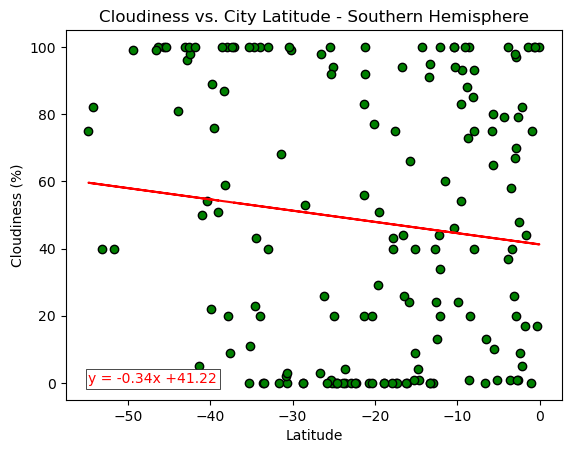

In [21]:
# Southern Hemisphere
param = {"x_values": southern_hemi_df["Lat"],
         "y_values": southern_hemi_df["Cloudiness"],
         "hemis": "Southern Hemisphere",
         "y_label": "Cloudiness (%)",
         "color": "g",
         "fig": 10
}
linear_reg_plots(**param)

**Discussion about the linear relationship:**

- The r-value < 0.3 shows there is a very week correlation between the latitude and the cloudiness.
- This means there is no relation between the distance to the equator and the city cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.11247546315303347


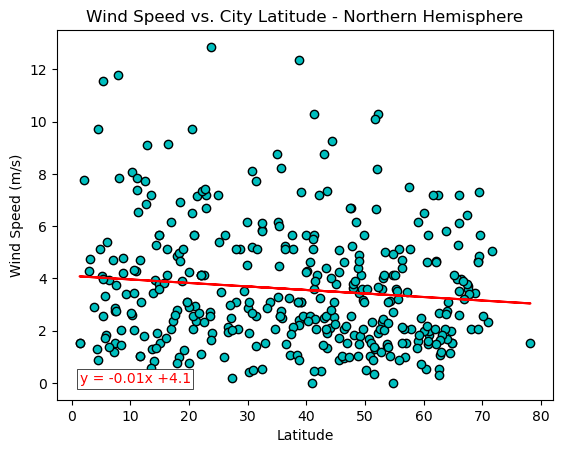

In [22]:
# Northern Hemisphere
param = {"x_values": northern_hemi_df["Lat"],
         "y_values": northern_hemi_df["Wind Speed"],
         "hemis": "Northern Hemisphere",
         "y_label": "Wind Speed (m/s)",
         "color": "c",
         "fig": 11
}
linear_reg_plots(**param)

The r-value is: -0.010940266236984904


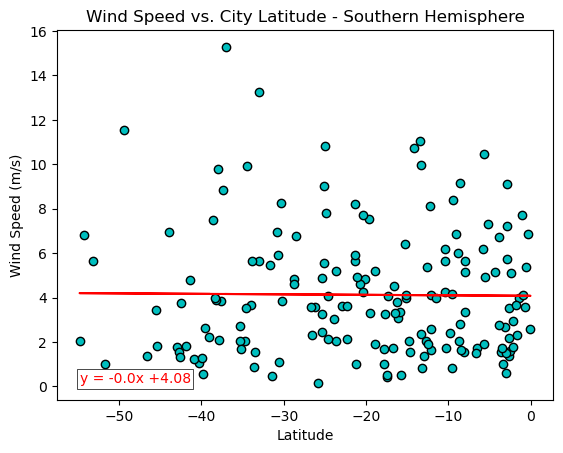

In [23]:
# Southern Hemisphere
param = {"x_values": southern_hemi_df["Lat"],
         "y_values": southern_hemi_df["Wind Speed"],
         "hemis": "Southern Hemisphere",
         "y_label": "Wind Speed (m/s)",
         "color": "c",
         "fig": 12
}
linear_reg_plots(**param)

**Discussion about the linear relationship:**

- The r-value < 0.3 on the northern hemisphere and < 0.5 in the southern hemisphere show there is a very weak and weak correlation respectively, between the latitude and the wind speed.
- This means there is no relation between the distance to the equator and the city wind speed.